In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import numpy as np
import json
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
DATASET_PATH = os.path.join(os.getcwd(), 'data.json')

In [3]:
def load_data(dataset_path):
    with open(dataset_path, 'r')as file:
        data = json.load(file)

        inputs = np.array(data['mfcc'])
        targets = np.array(data['labels'])

        return inputs, targets

In [4]:
x, y = load_data(DATASET_PATH)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
with tf.device('/gpu:0'):
    x = Input(shape=[x_train.shape[1], x_train.shape[2]])
    h = Flatten()(x)
    h = Dense(units=512, activation='relu',kernel_regularizer=l2(0.001))(h)
    h = Dropout(0.25)(h)
    h = Dense(units=256, activation='relu',kernel_regularizer=l2(0.001))(h)
    h = Dropout(0.25)(h)
    h = Dense(units=64, activation='relu',kernel_regularizer=l2(0.001))(h)
    h = Dropout(0.25)(h)
    y = Dense(units=10, activation='softmax')(h)
    model = Model(inputs=x, outputs=y, name="ANN_MODEL")
    optimizer = Adam(learning_rate=0.0001)
    loss = SparseCategoricalCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    hist = model.fit(x=x_train, y=y_train,
                         validation_data=(x_test, y_test),
                         batch_size=32, epochs=120)

Model: "ANN_MODEL"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 130, 13)]         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16

219/219 [==============================] - 2s 7ms/step - loss: 2.1111 - accuracy: 0.4833 - val_loss: 2.1581 - val_accuracy: 0.5010
Epoch 48/120
219/219 [==============================] - 1s 6ms/step - loss: 2.0405 - accuracy: 0.5030 - val_loss: 2.1295 - val_accuracy: 0.5080
Epoch 49/120
219/219 [==============================] - 2s 8ms/step - loss: 2.0292 - accuracy: 0.5060 - val_loss: 2.0779 - val_accuracy: 0.5257
Epoch 50/120
219/219 [==============================] - 2s 9ms/step - loss: 1.9876 - accuracy: 0.5144 - val_loss: 2.0564 - val_accuracy: 0.5130
Epoch 51/120
219/219 [==============================] - 1s 6ms/step - loss: 1.9655 - accuracy: 0.5133 - val_loss: 2.0584 - val_accuracy: 0.5194
Epoch 52/120
219/219 [==============================] - 1s 7ms/step - loss: 1.9235 - accuracy: 0.5220 - val_loss: 2.0263 - val_accuracy: 0.5234
Epoch 53/120
219/219 [==============================] - 1s 6ms/step - loss: 1.8617 - accuracy: 0.5433 - val_loss: 1.9757 - val_accuracy: 0.5347
Epoch

Epoch 104/120
219/219 [==============================] - 1s 6ms/step - loss: 0.9365 - accuracy: 0.7868 - val_loss: 1.8595 - val_accuracy: 0.6028
Epoch 105/120
219/219 [==============================] - 1s 6ms/step - loss: 0.9383 - accuracy: 0.7890 - val_loss: 1.8657 - val_accuracy: 0.5975
Epoch 106/120
219/219 [==============================] - 2s 8ms/step - loss: 0.9313 - accuracy: 0.7898 - val_loss: 1.8307 - val_accuracy: 0.5895
Epoch 107/120
219/219 [==============================] - 1s 6ms/step - loss: 0.8964 - accuracy: 0.7973 - val_loss: 1.7672 - val_accuracy: 0.6078
Epoch 108/120
219/219 [==============================] - 2s 7ms/step - loss: 0.9006 - accuracy: 0.7930 - val_loss: 1.7866 - val_accuracy: 0.6218
Epoch 109/120
219/219 [==============================] - 1s 6ms/step - loss: 0.8792 - accuracy: 0.7973 - val_loss: 1.7608 - val_accuracy: 0.6061
Epoch 110/120
219/219 [==============================] - 2s 8ms/step - loss: 0.8772 - accuracy: 0.8001 - val_loss: 1.7465 - val_ac

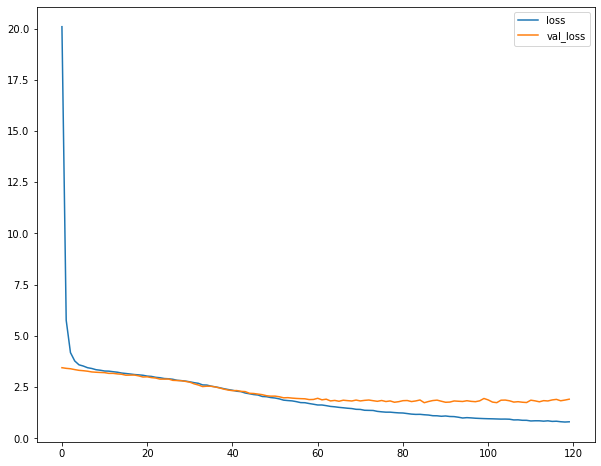

In [17]:
pd.DataFrame(hist.history)[["loss",'val_loss']].plot(figsize=(10,8))

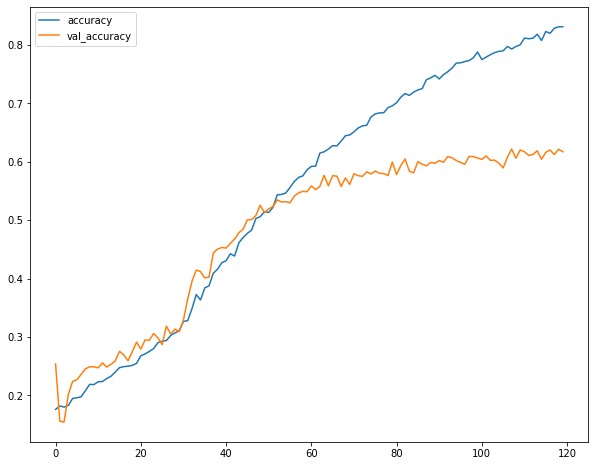

In [20]:
pd.DataFrame(hist.history)[["accuracy",'val_accuracy']].plot(figsize=(10,8))